<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_11_Correzione_dell'errore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_distribution

## Modello di errore

In [ ]:
def get_noise(p_meas, p_gate):
  error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])

  error_gate1 = depolarizing_error(p_gate, 1)
  error_gate2 = error_gate1.tensor(error_gate1)

  noise_model = NoiseModel()
  noise_model.add_all_qubit_quantum_error(error_meas, "measure")
  noise_model.add_all_qubit_quantum_error(error_gate1, ["x"])
  noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])

  return noise_model

In [ ]:
noise_model = get_noise(0.01, 0.01)
noise_model

<NoiseModel on ['cx', 'x', 'measure']>

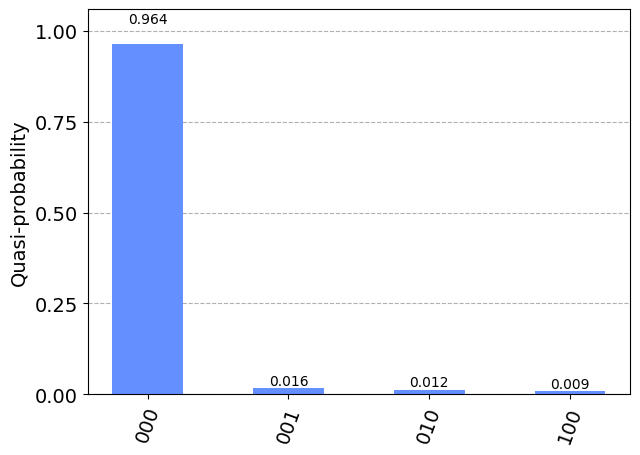

In [ ]:
qc = QuantumCircuit(3, 3)
qc.measure([0,1,2], [0,1,2])

simulator = Aer.get_backend('qasm_simulator')

counts = execute(qc, simulator, noise_model=noise_model).result().get_counts()

plot_distribution(counts)

In [ ]:
noise_model = get_noise(0.5, 0.5)
noise_model

<NoiseModel on ['cx', 'x', 'measure']>

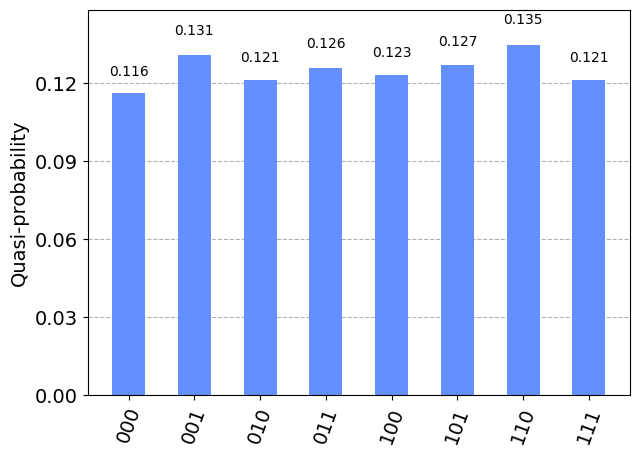

In [ ]:
qc = QuantumCircuit(3, 3)
qc.measure([0,1,2], [0,1,2])

simulator = Aer.get_backend('qasm_simulator')

counts = execute(qc, simulator, noise_model=noise_model).result().get_counts()

plot_distribution(counts)

## Conservazione dei qubit!

In [ ]:
cq = QuantumRegister(2, 'code_qubit')
lq = QuantumRegister(1, 'ancilla_qubit')
sb = ClassicalRegister(1, 'syndrome_bit')

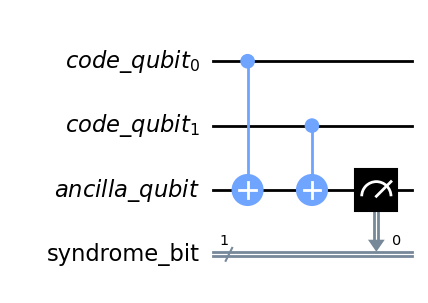

In [ ]:
## Caso 00
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw(output="mpl")

In [ ]:
execute(qc, simulator).result().get_counts()

{'0': 1024}

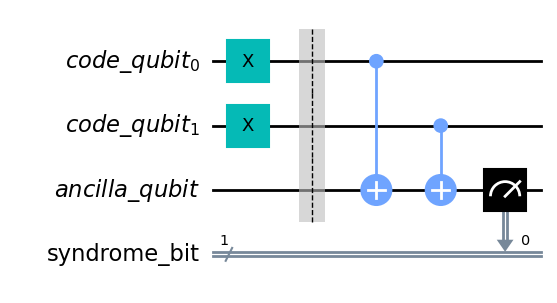

In [ ]:
## Caso 11
qc = QuantumCircuit(cq, lq, sb)
qc.x(cq)
qc.barrier()
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw(output="mpl")

In [ ]:
execute(qc, simulator).result().get_counts()

{'0': 1024}

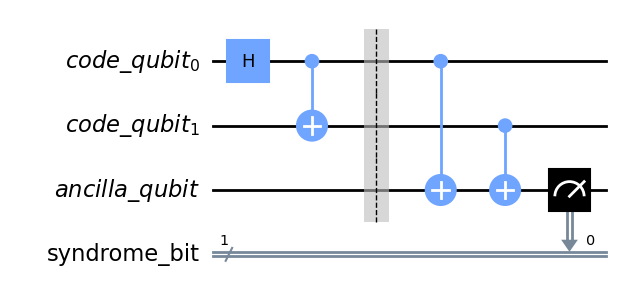

In [ ]:
## Caso 00 + 11
qc = QuantumCircuit(cq, lq, sb)
qc.h(cq[0])
qc.cx(cq[0], cq[1])
qc.barrier()
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw(output="mpl")

In [ ]:
execute(qc, simulator).result().get_counts()

{'0': 1024}

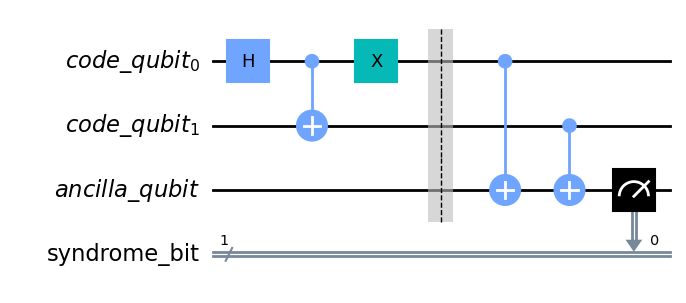

In [ ]:
## Caso 01 + 10
qc = QuantumCircuit(cq, lq, sb)
qc.h(cq[0])
qc.cx(cq[0], cq[1])
qc.x(cq[0])
qc.barrier()
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw(output="mpl")

In [ ]:
execute(qc, simulator).result().get_counts()

{'1': 1024}

## Quantum repetition code

In [ ]:
!pip install git+https://github.com/NCCR-SPIN/topological_codes.git

In [ ]:
!pip install retworkx

In [ ]:
from topological_codes import RepetitionCode, GraphDecoder, lookuptable_decoding

In [ ]:
n = 3
T = 1

code = RepetitionCode(n, T)

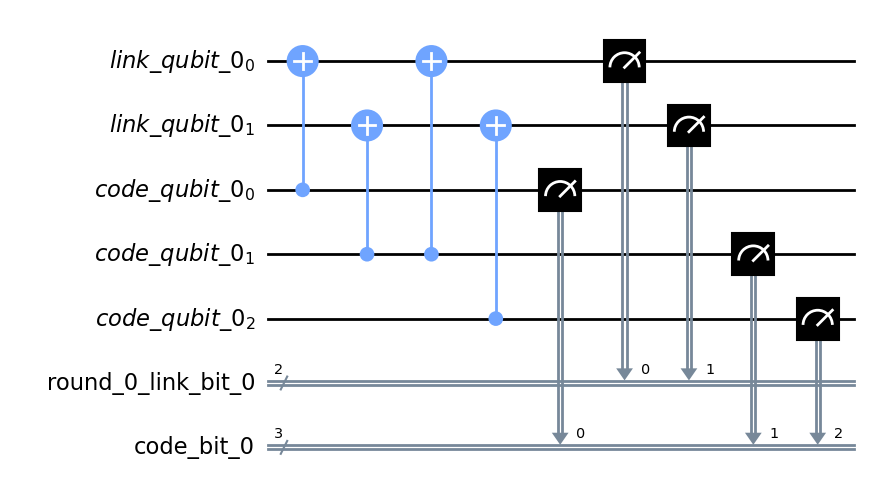

In [ ]:
code.circuit['0'].draw(output="mpl")

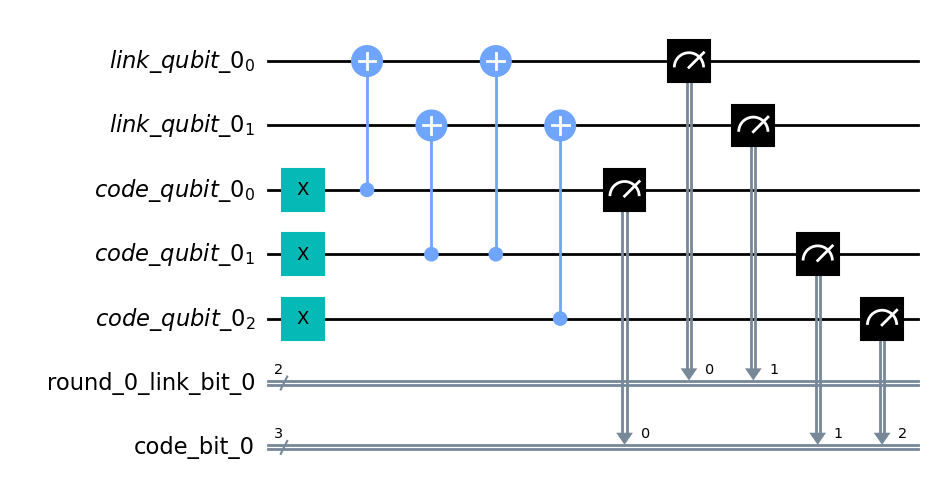

In [ ]:
code.circuit['1'].draw(output="mpl")

In [ ]:
def get_raw_results(code, noise_model=None):
  circuits = code.get_circuit_list()
  raw_results = {}
  backend = Aer.get_backend('qasm_simulator')
  for i in range(2):
    job = execute(circuits[i], backend, noise_model=noise_model)
    raw_results[str(i)] = job.result().get_counts(str(i))
  return raw_results

In [ ]:
raw_results = get_raw_results(code)
for result in raw_results:
  print(result)

0
1


In [ ]:
noise_model = get_noise(0.05, 0.05)
raw_results = get_raw_results(code, noise_model)
for result in raw_results:
  print(result)

0
1


## Lookup table decoding

In [ ]:
circuits = code.get_circuit_list()
table_results = {}
for log in range(2):
    job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model, shots=10000 )
    table_results[str(log)] = job.result().get_counts(str(log))
table_results

{'0': {'000 11': 61,
  '001 11': 1,
  '101 11': 1,
  '101 00': 33,
  '010 10': 49,
  '110 00': 33,
  '010 01': 218,
  '001 01': 45,
  '100 01': 56,
  '110 10': 5,
  '011 00': 45,
  '010 00': 511,
  '001 10': 49,
  '000 01': 700,
  '100 10': 58,
  '111 00': 7,
  '101 01': 5,
  '001 00': 504,
  '100 00': 509,
  '110 11': 2,
  '000 10': 645,
  '011 10': 3,
  '010 11': 23,
  '011 01': 15,
  '101 10': 8,
  '000 00': 6385,
  '110 01': 21,
  '100 11': 5,
  '011 11': 1,
  '111 10': 2},
 '1': {'000 10': 2,
  '110 10': 46,
  '001 01': 17,
  '010 01': 17,
  '100 01': 24,
  '111 01': 615,
  '010 11': 12,
  '101 00': 498,
  '101 11': 146,
  '111 00': 5872,
  '101 01': 229,
  '100 10': 9,
  '011 10': 212,
  '100 00': 45,
  '110 11': 19,
  '111 11': 74,
  '110 00': 498,
  '001 00': 40,
  '111 10': 652,
  '001 11': 31,
  '000 00': 2,
  '110 01': 196,
  '011 01': 49,
  '000 01': 5,
  '001 10': 18,
  '011 00': 501,
  '010 00': 35,
  '101 10': 74,
  '011 11': 32,
  '010 10': 18,
  '100 11': 12}}

In [ ]:
p = lookuptable_decoding(raw_results, table_results)
p

{'0': 0.0236, '1': 0.0226}